In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score


In [9]:
data= pd.read_csv("C:/Users/Vijay Rathod/Downloads/energy_production - energy_production.csv",sep=';')
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


# EDA

In [10]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [12]:
data[data.duplicated()]## To see the duplicated rows in our dat

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [13]:
data1=data.drop_duplicates().reset_index(drop=True)
data1.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [14]:
data1.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


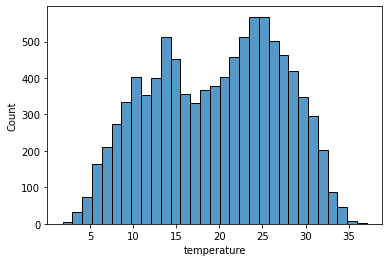

In [15]:
sns.histplot(data1['temperature'])
plt.show()

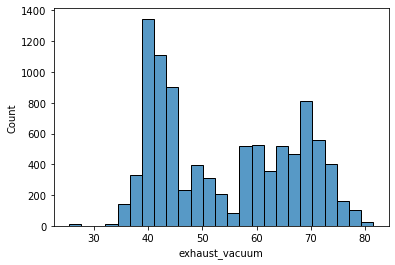

In [16]:
sns.histplot(data1['exhaust_vacuum'])
plt.show()

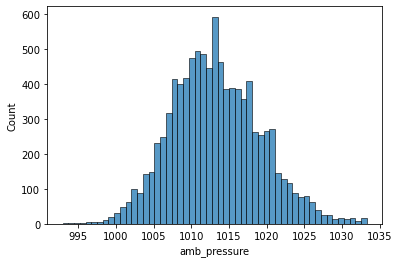

In [17]:
sns.histplot(data1['amb_pressure'])
plt.show()

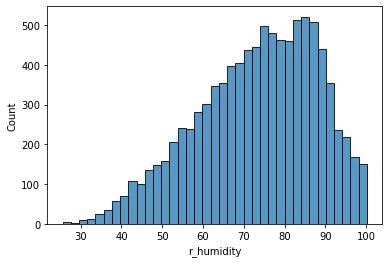

In [18]:
sns.histplot(data1['r_humidity'])
plt.show()

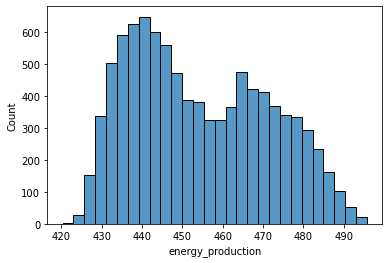

In [19]:
sns.histplot(data1['energy_production'])
plt.show()

# Checking for Outliers

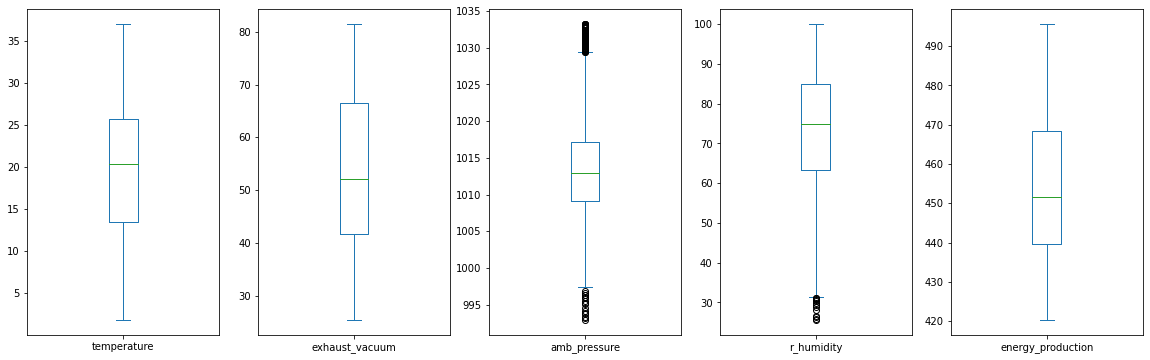

In [20]:
data1.plot(kind='box', subplots=True, figsize=(20,6))
plt.show()

# Removing the outliers

In [21]:
data1.drop(data1.index[data1['amb_pressure']<999],inplace=True)
data1.drop(data1.index[data1['amb_pressure']>1028],inplace=True)
data1.drop(data1.index[data1['r_humidity']<32],inplace=True)

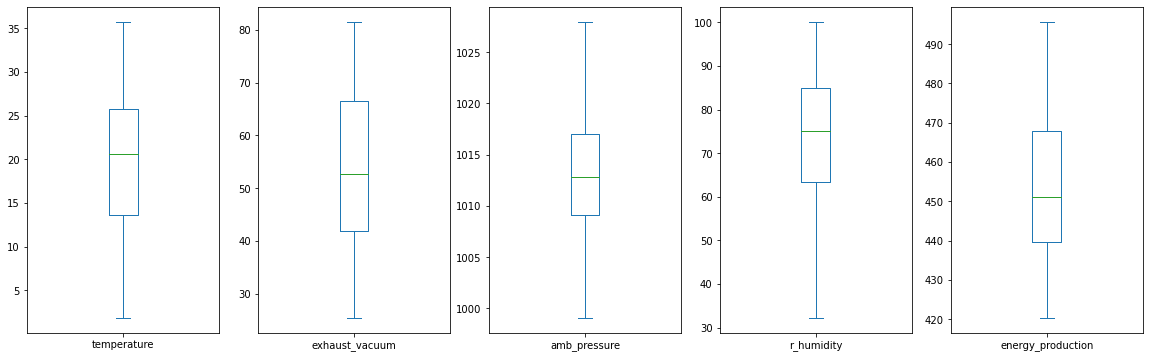

In [22]:
data1.plot(kind='box', subplots=True, figsize=(20,6))
plt.show()

# Correlation

In [23]:
corr_matrix=data1.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.841468,-0.510873,-0.543108,-0.946855
exhaust_vacuum,0.841468,1.000000,-0.417610,-0.309110,-0.868092
amb_pressure,-0.510873,-0.417610,1.000000,0.110307,0.523352
r_humidity,-0.543108,-0.309110,0.110307,1.000000,0.388155
energy_production,-0.946855,-0.868092,0.523352,0.388155,1.000000


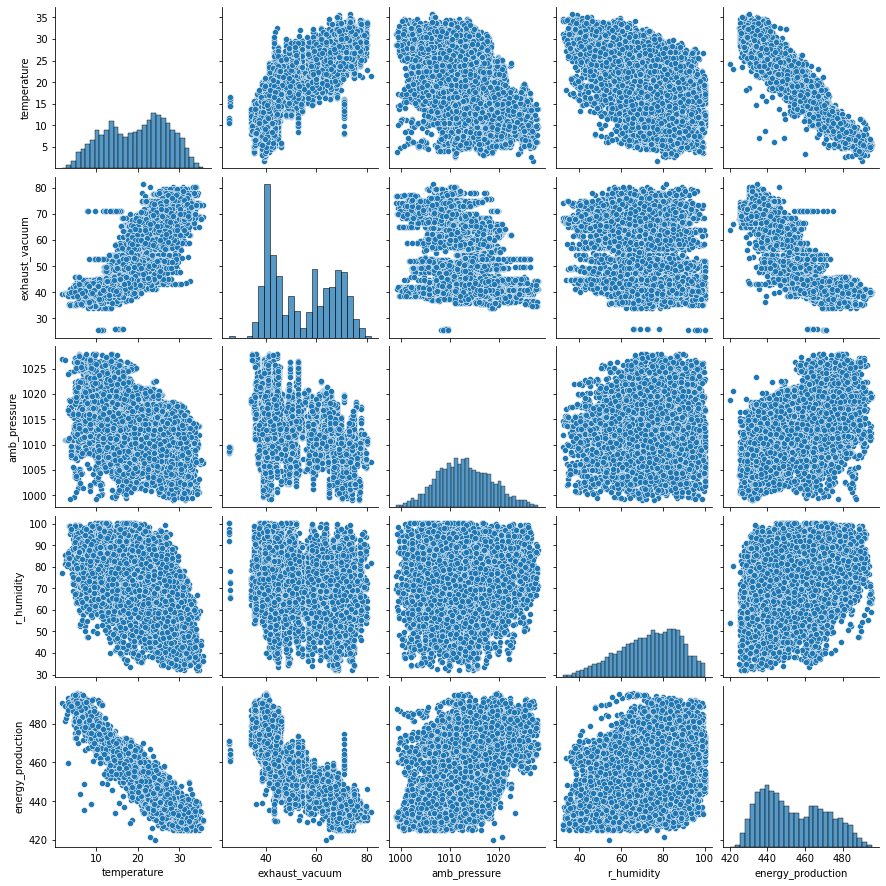

In [24]:
sns.pairplot(data1)

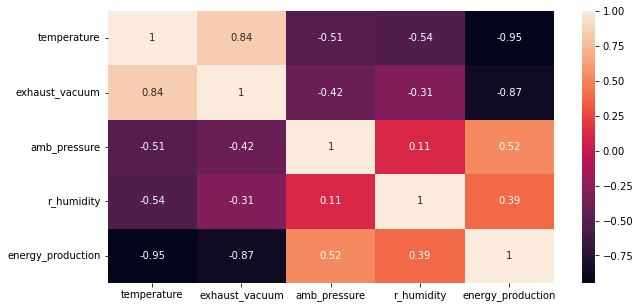

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Normalizing the data

In [26]:
normal_data=preprocessing.normalize(data1)
print(normal_data)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]


In [27]:
normal_data=pd.DataFrame(normal_data)
print(normal_data)

             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9356  0.015421  0.044810  0.906771  0.073784  0.412404
9357  0.022222  0.058713  0.912432  0.047445  0.401592
9358  0.027765  0.051297  0.916848  0.051297  0.391607
9359  0.020732  0.059538  0.919990  0.072374  0.380008
9360  0.015842  0.043955  0.911105  0.056825  0.405555

[9361 rows x 5 columns]


In [28]:
normal_data.columns = data.columns
normal_data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142


In [29]:
corr_matrix=normal_data.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.850401,0.941727,-0.508723,-0.932220
exhaust_vacuum,0.850401,1.000000,0.827177,-0.282665,-0.879456
amb_pressure,0.941727,0.827177,1.000000,-0.486997,-0.983696
r_humidity,-0.508723,-0.282665,-0.486997,1.000000,0.341797
energy_production,-0.932220,-0.879456,-0.983696,0.341797,1.000000


In [30]:
normal_data2=preprocessing.normalize(data)
print(normal_data2)
normal_data2=pd.DataFrame(normal_data2)
print(normal_data2)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]
             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9563  0.015421  0.044810  0.906771  0.073784  0.412404
9564  0.022222  0.058713  0.912432  0.047445  0.401592
9565  0.027765  0.051297  0.916848  0.051297  0.391607
9566  0.020732  0.059538  0.919990  0.072374  0.380008
9567  0.015842  0.043955  0.911105  0.056

In [31]:
normal_data2.columns = data.columns
normal_data2.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142


# Checking VIF values

In [32]:
import statsmodels.formula.api as smf

In [33]:
rsq_temp = smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=normal_data).fit().rsquared  
vif_temp = 1/(1-rsq_temp) # 16.33

rsq_exh = smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=normal_data).fit().rsquared  
vif_exh = 1/(1-rsq_exh) # 564.98

rsq_amb = smf.ols('amb_pressure~exhaust_vacuum+temperature+r_humidity',data=normal_data).fit().rsquared  
vif_amb = 1/(1-rsq_amb) #  564.84

rsq_r_hum = smf.ols('r_humidity~amb_pressure+exhaust_vacuum+temperature',data=normal_data).fit().rsquared  
vif_r_hum = 1/(1-rsq_r_hum) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_temp,vif_exh,vif_amb,vif_r_hum]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,temperature,11.278418
1,exhaust_vacuum,4.173990
2,amb_pressure,9.099142
3,r_humidity,1.525502


# Building models for various data_set

In [34]:
data_set1=data1 #### data_set after removeing outliers and duplicates but without normalization
data_set1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57


In [35]:
data_set2=normal_data  #### data_set for removed outliers and duplicted values and then normalized
data_set2

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142
...,...,...,...,...,...
9356,0.015421,0.044810,0.906771,0.073784,0.412404
9357,0.022222,0.058713,0.912432,0.047445,0.401592
9358,0.027765,0.051297,0.916848,0.051297,0.391607
9359,0.020732,0.059538,0.919990,0.072374,0.380008


In [36]:
data_set3=data   ### data_set for our raw data and without normalizing
data_set3

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [37]:
data_set4=normal_data2  ### data_set for without removing outliers and duplictes then normalizing them
data_set4

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142
...,...,...,...,...,...
9563,0.015421,0.044810,0.906771,0.073784,0.412404
9564,0.022222,0.058713,0.912432,0.047445,0.401592
9565,0.027765,0.051297,0.916848,0.051297,0.391607
9566,0.020732,0.059538,0.919990,0.072374,0.380008


# We have to make 4 differnt X and Y since we 4 differnt data_set

In [38]:
X1=data_set1.iloc[:,0:4] #### data_set after removeing outliers and duplicates but without normalization
Y1=data_set1.iloc[:,4]

In [39]:
X2=data_set2.iloc[:,0:4] #### data_set for removed outliers and duplicted values and then normalized
Y2=data_set2.iloc[:,4]

In [40]:
X3=data_set3.iloc[:,0:4] ### data_set for our raw data and without normalizing
Y3=data_set3.iloc[:,4]

In [41]:
X4=data_set4.iloc[:,0:4] ### data_set for without removing outliers and duplictes then normalizing them
Y4=data_set4.iloc[:,4]

# Feature Engineering

In [42]:
# Feature Importance with Extra Trees regression
from sklearn.tree import  DecisionTreeRegressor
X = X2
Y = Y2
# feature extraction
model = DecisionTreeRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[2.28828330e-04 9.91157840e-03 9.69704645e-01 2.01549479e-02]


In [43]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X=X2
Y=Y2
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)
print(selector.support_,selector.ranking_)

[ True  True  True  True] [1 1 1 1]


# splitting the data set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=0.25,shuffle=True)
print(X_train1.shape)
print(X_test1.shape)

(7020, 4)
(2341, 4)


In [46]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,Y2,test_size=0.25,shuffle=True)
print(X_train2.shape)
print(X_test2.shape)

(7020, 4)
(2341, 4)


In [47]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,Y3,test_size=0.25,shuffle=True)
print(X_train3.shape)
print(X_test3.shape)

(7176, 4)
(2392, 4)


In [48]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,Y4,test_size=0.25,shuffle=True)
print(X_train4.shape)
print(X_test4.shape)

(7176, 4)
(2392, 4)


# Building Models

# 1] KNN

In [51]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# data_set 1

In [50]:

n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train1,y_train1)
print(grid.best_score_)
print(grid.best_params_)

0.9412456743949116
{'n_neighbors': 5}


In [43]:
KNN_model1 = KNeighborsRegressor(n_neighbors=6)
KNN_model1.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=6)

In [44]:
y_pred1= KNN_model1.predict(X_test1)
KNN_R1=metrics.explained_variance_score(y_test1,y_pred1) 
KNN_R1

0.9478345433253341

R-Squared: It means how much of the variation in the target variable that can be explained by the set of features used in training the model.

# data_set2

In [45]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train2,y_train2)
print(grid.best_score_)
print(grid.best_params_)

0.9891188921277582
{'n_neighbors': 3}


In [46]:
KNN_model2 = KNeighborsRegressor(n_neighbors=3)
KNN_model2.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred2= KNN_model2.predict(X_test2)
KNN_R2=metrics.explained_variance_score(y_test2,y_pred2) 
KNN_R2

0.9877805390198443

# data_set3

In [48]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train3,y_train3)
print(grid.best_score_)
print(grid.best_params_)

0.9416940373699025
{'n_neighbors': 5}


In [49]:
KNN_model3 = KNeighborsRegressor(n_neighbors=5)
KNN_model3.fit(X_train3, y_train3)

KNeighborsRegressor()

In [50]:
y_pred3= KNN_model3.predict(X_test3)
KNN_R3=metrics.explained_variance_score(y_test3,y_pred3) 
KNN_R3

0.9464101027748615

# data_set4

In [51]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsRegressor()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train4,y_train4)
print(grid.best_score_)
print(grid.best_params_)

0.9891739751563684
{'n_neighbors': 3}


In [52]:
KNN_model4 = KNeighborsRegressor(n_neighbors=3)
KNN_model4.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=3)

In [53]:
y_pred4= KNN_model4.predict(X_test4)
KNN_R4=metrics.explained_variance_score(y_test4,y_pred4) 
KNN_R4

0.9907031669670634

# RMSE for all KNN model

Root Mean Squared Error (RMSE): measures the average error performed by the model in predicting the outcome for an observation.


In [54]:
KNN_rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
print(KNN_rmse1)

3.901171309799151


In [55]:
KNN_rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print(KNN_rmse2)

0.0013104672531857224


In [56]:
KNN_rmse3=np.sqrt(mean_squared_error(y_test3,y_pred3))
print(KNN_rmse3)

3.964972576632127


In [57]:
KNN_rmse4=np.sqrt(mean_squared_error(y_test4,y_pred4))
print(KNN_rmse4)

0.0011643429010082674


# 2] Random Forest

# data_set1

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
Random_model1=RandomForestRegressor(n_estimators=100,random_state=0)
Random_model1.fit(X_train1,y_train1)

RandomForestRegressor(random_state=0)

In [60]:
y_pred1=Random_model1.predict(X_test1)
Random_R1=metrics.explained_variance_score(y_test1,y_pred1) 
Random_R1

0.9627936007358104

# data_set 2

In [61]:
Random_model2=RandomForestRegressor(n_estimators=100,random_state=0)
Random_model2.fit(X_train2,y_train2)

RandomForestRegressor(random_state=0)

In [62]:
y_pred2=Random_model2.predict(X_test2)
Random_R2=metrics.explained_variance_score(y_test2,y_pred2) 
Random_R2

0.9993962391234068

# data_set2

In [63]:
Random_model3=RandomForestRegressor(n_estimators=100,random_state=0)
Random_model3.fit(X_train3,y_train3)

RandomForestRegressor(random_state=0)

In [64]:
y_pred3=Random_model3.predict(X_test3)
Random_R3=metrics.explained_variance_score(y_test3,y_pred3)
Random_R3

0.960801204536083

# data_set4

In [65]:
Random_model4=RandomForestRegressor(n_estimators=100,random_state=0)
Random_model4.fit(X_train4,y_train4)

RandomForestRegressor(random_state=0)

In [66]:
y_pred4=Random_model4.predict(X_test4)
Random_R4=metrics.explained_variance_score(y_test4,y_pred4) 
Random_R4

0.9994087382307748

# RMSE for all Random Forest model

In [67]:
Random_rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
print(Random_rmse1)

3.2945563182832345


In [68]:
Random_rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print(Random_rmse2)

0.0002912166988145625


In [69]:
Random_rmse3=np.sqrt(mean_squared_error(y_test3,y_pred3))
print(KNN_rmse3)

3.964972576632127


In [70]:
Random_rmse4=np.sqrt(mean_squared_error(y_test4,y_pred4))
print(Random_rmse4)

0.00029369907412117087


# 3] Bagging

In [71]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

# data_set1

In [72]:
Bagging_model1=BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
Bagging_model1.fit(X_train1,y_train1)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [73]:
y_pred1=Bagging_model1.predict(X_test1)
Bagging_R1=metrics.explained_variance_score(y_test1,y_pred1) 
Bagging_R1

0.9590438332263421

# data_set2

In [74]:
Bagging_model2=BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
Bagging_model2.fit(X_train2,y_train2)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [75]:
y_pred2=Bagging_model2.predict(X_test2)
Bagging_R2=metrics.explained_variance_score(y_test2,y_pred2) 
Bagging_R2

0.9991327180308391

# data_set3

In [76]:
Bagging_model3=BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
Bagging_model3.fit(X_train3,y_train3)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [77]:
y_pred3=Bagging_model3.predict(X_test3)
Bagging_R3=metrics.explained_variance_score(y_test3,y_pred3) 
Bagging_R3

0.9562889381041966

# data_set4

In [78]:
Bagging_model4=BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
Bagging_model4.fit(X_train4,y_train4)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [79]:
y_pred4=Bagging_model4.predict(X_test4)
Bagging_R4=metrics.explained_variance_score(y_test4,y_pred4) 
Bagging_R4

0.9992128349704131

# RMSE for all Bagging Models

In [80]:
Bagging_rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
print(Bagging_rmse1)

3.4569618015650265


In [81]:
Bagging_rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print(Bagging_rmse2)

0.00034902884378101195


In [82]:
Bagging_rmse3=np.sqrt(mean_squared_error(y_test3,y_pred3))
print(Bagging_rmse3)

3.580952572092876


In [83]:
Bagging_rmse4=np.sqrt(mean_squared_error(y_test4,y_pred4))
print(Bagging_rmse4)

0.00033880311180023583


# 4] Adaboost

In [84]:
from sklearn.ensemble import AdaBoostRegressor

# data_set1

In [85]:
Ada_model1=AdaBoostRegressor()
Ada_model1.fit(X_train1,y_train1)

AdaBoostRegressor()

In [86]:
y_pred1=Ada_model1.predict(X_test1)
Adaboost_R1=metrics.explained_variance_score(y_test1,y_pred1)
Adaboost_R1

0.8953639795962429

# data_set2

In [87]:
Ada_model2=AdaBoostRegressor()
Ada_model2.fit(X_train2,y_train2)

AdaBoostRegressor()

In [88]:
y_pred2=Ada_model2.predict(X_test2)
Adaboost_R2=metrics.explained_variance_score(y_test2,y_pred2)
Adaboost_R2

0.9823217680824877

# data_set3

In [89]:
Ada_model3=AdaBoostRegressor()
Ada_model3.fit(X_train3,y_train3)

AdaBoostRegressor()

In [90]:
y_pred3=Ada_model3.predict(X_test3)
Adaboost_R3=metrics.explained_variance_score(y_test3,y_pred3)
Adaboost_R3

0.9002602630295695

# data_set4

In [91]:
Ada_model4=AdaBoostRegressor()
Ada_model4.fit(X_train4,y_train4)


AdaBoostRegressor()

In [92]:
y_pred4=Ada_model4.predict(X_test4)
Adaboost_R4=metrics.explained_variance_score(y_test4,y_pred4)
Adaboost_R4

0.9841305464015132

# RMSE for all Adabosst Models

In [93]:
Ada_rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
print(Ada_rmse1)

5.814427353288762


In [94]:
Ada_rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print(Ada_rmse2)

0.001576361410519216


In [95]:
Ada_rmse3=np.sqrt(mean_squared_error(y_test3,y_pred3))
print(Ada_rmse3)

5.545560442659317


In [96]:
Ada_rmse4=np.sqrt(mean_squared_error(y_test4,y_pred4))
print(Ada_rmse4)

0.0015215325026457264


# 5] Multi-Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [98]:
Multi_model=LinearRegression()
Multi_model.fit(X_train2,y_train2)

LinearRegression()

In [99]:
y_pred=Multi_model.predict(X_test2)
multi_R=metrics.explained_variance_score(y_test2,y_pred) 
multi_R

0.9990635299984904

# RMSE for Multi-Linear Regression

In [100]:
Multi_rmse=np.sqrt(mean_squared_error(y_test2,y_pred))
print(Multi_rmse)

0.0003626568487566455


# 6] SVM

In [101]:
from sklearn import svm
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [102]:
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [103]:
model_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
model_SVR.fit(X_train2,y_train2)
print("Best parameters obtained by Grid Search:",model_SVR.best_params_,model_SVR.best_score_)

Best parameters obtained by Grid Search: {'C': 10, 'epsilon': 0.0001, 'kernel': 'rbf'} 0.999690703631791


In [104]:
y_pred=model_SVR.predict(X_test2)
SVM_R=metrics.explained_variance_score(y_test2,y_pred) 
SVM_R

0.9997269158718003

# RMSE for SVM

In [105]:
SVM_rmse=np.sqrt(mean_squared_error(y_test2,y_pred))
print(SVM_rmse)

0.0001966620348971101


# 7] Decision Tree 

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
model_tree=DecisionTreeRegressor(criterion='mse',max_depth=3)
model_tree.fit(X_train2,y_train2)

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=3)

In [108]:
y_pred_tree=model_tree.predict(X_test2)
Decision_R=metrics.explained_variance_score(y_test2,y_pred_tree) 
Decision_R

0.9469269971292862

# RMSE for Decision Tree

In [109]:
Decision_rmse=np.sqrt(mean_squared_error(y_test2,y_pred_tree))
print(Decision_rmse)

0.002730536679920758


# 8] XGBoost 

In [110]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [111]:
model_xgb=XGBRegressor()
model_xgb.fit(X_train2,y_train2)
score = model_xgb.score(X_train2, y_train2)  
print("Training score: ", score)

Training score:  0.9992839238944667


In [112]:
y_pred_xgb=model_xgb.predict(X_test2)
XGB_R= model_xgb.score(X_test2,y_test2)
XGB_R

0.9988446983115447

# RMSE for XGBoost

In [113]:
XGBoost_rmse=np.sqrt(mean_squared_error(y_test2,y_pred_xgb))
print(XGBoost_rmse)

0.00040280662635661167


# 9] Neural Networking 

In [114]:
# Importing the necessary packages
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [115]:
model_NN=Sequential()
model_NN.add(Dense(20,input_dim=4,activation='relu'))
model_NN.add(Dense(10,activation='relu'))
model_NN.add(Dense(1,activation='linear'))
model_NN.compile(optimizer="Adam",loss='mean_squared_error',metrics=['accuracy'])

In [116]:
model_NN.fit(X_train2,y_train2,epochs=1000,verbose=1)

Epoch 1/1000
220/220 [==============================] - 1s 1ms/step - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 2/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.0583e-04 - accuracy: 0.0000e+00
Epoch 3/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.8257e-04 - accuracy: 0.0000e+00
Epoch 4/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.5630e-04 - accuracy: 0.0000e+00
Epoch 5/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.2826e-04 - accuracy: 0.0000e+00
Epoch 6/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.0178e-04 - accuracy: 0.0000e+00
Epoch 7/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.6635e-05 - accuracy: 0.0000e+00
Epoch 8/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.7711e-05 - accuracy: 0.0000e+00
Epoch 9/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.3996e-05 - accuracy: 0.0000e+00
Epoch 10/1000


220/220 [==============================] - 0s 1ms/step - loss: 1.2380e-05 - accuracy: 0.0000e+00
Epoch 148/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.2678e-05 - accuracy: 0.0000e+00
Epoch 149/1000
220/220 [==============================] - 0s 993us/step - loss: 1.3363e-05 - accuracy: 0.0000e+00
Epoch 150/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.3062e-05 - accuracy: 0.0000e+00
Epoch 151/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.3265e-05 - accuracy: 0.0000e+00
Epoch 152/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.2264e-05 - accuracy: 0.0000e+00
Epoch 153/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.2796e-05 - accuracy: 0.0000e+00
Epoch 154/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.3122e-05 - accuracy: 0.0000e+00
Epoch 155/1000
220/220 [==============================] - 0s 1ms/step - loss: 1.3138e-05 - accuracy: 0.0000e+00
Epoch

220/220 [==============================] - 0s 1ms/step - loss: 8.8802e-06 - accuracy: 0.0000e+00
Epoch 221/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.0493e-06 - accuracy: 0.0000e+00
Epoch 222/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.0989e-06 - accuracy: 0.0000e+00
Epoch 223/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.1356e-06 - accuracy: 0.0000e+00
Epoch 224/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.4747e-06 - accuracy: 0.0000e+00
Epoch 225/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.5666e-06 - accuracy: 0.0000e+00
Epoch 226/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.5228e-06 - accuracy: 0.0000e+00
Epoch 227/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.0333e-06 - accuracy: 0.0000e+00
Epoch 228/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.1727e-06 - accuracy: 0.0000e+00
Epoch 2

220/220 [==============================] - 0s 1ms/step - loss: 2.4028e-06 - accuracy: 0.0000e+00
Epoch 294/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.4236e-06 - accuracy: 0.0000e+00
Epoch 295/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.2022e-06 - accuracy: 0.0000e+00
Epoch 296/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.3217e-06 - accuracy: 0.0000e+00
Epoch 297/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.2119e-06 - accuracy: 0.0000e+00
Epoch 298/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.1247e-06 - accuracy: 0.0000e+00
Epoch 299/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.2214e-06 - accuracy: 0.0000e+00
Epoch 300/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.5302e-06 - accuracy: 0.0000e+00
Epoch 301/1000
220/220 [==============================] - 0s 1ms/step - loss: 2.6733e-06 - accuracy: 0.0000e+00
Epoch 3

220/220 [==============================] - 0s 1ms/step - loss: 8.5359e-07 - accuracy: 0.0000e+00
Epoch 440/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.2536e-07 - accuracy: 0.0000e+00
Epoch 441/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.6799e-07 - accuracy: 0.0000e+00
Epoch 442/1000
220/220 [==============================] - 0s 1ms/step - loss: 9.9512e-07 - accuracy: 0.0000e+00
Epoch 443/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.0614e-07 - accuracy: 0.0000e+00
Epoch 444/1000
220/220 [==============================] - 0s 1ms/step - loss: 6.5399e-07 - accuracy: 0.0000e+00
Epoch 445/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.5403e-07 - accuracy: 0.0000e+00
Epoch 446/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.8273e-07 - accuracy: 0.0000e+00
Epoch 447/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.9687e-07 - accuracy: 0.0000e+00
Epoch 4

220/220 [==============================] - 0s 1ms/step - loss: 7.9662e-07 - accuracy: 0.0000e+00
Epoch 513/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.3372e-07 - accuracy: 0.0000e+00
Epoch 514/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.6159e-07 - accuracy: 0.0000e+00
Epoch 515/1000
220/220 [==============================] - 0s 998us/step - loss: 6.0572e-07 - accuracy: 0.0000e+00
Epoch 516/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.8644e-07 - accuracy: 0.0000e+00
Epoch 517/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.3093e-07 - accuracy: 0.0000e+00
Epoch 518/1000
220/220 [==============================] - 0s 1ms/step - loss: 9.0640e-07 - accuracy: 0.0000e+00
Epoch 519/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.1009e-07 - accuracy: 0.0000e+00
Epoch 520/1000
220/220 [==============================] - 0s 1ms/step - loss: 9.3898e-07 - accuracy: 0.0000e+00
Epoch

220/220 [==============================] - 0s 986us/step - loss: 6.5715e-07 - accuracy: 0.0000e+00
Epoch 586/1000
220/220 [==============================] - 0s 970us/step - loss: 7.2150e-07 - accuracy: 0.0000e+00
Epoch 587/1000
220/220 [==============================] - 0s 904us/step - loss: 6.1925e-07 - accuracy: 0.0000e+00
Epoch 588/1000
220/220 [==============================] - 0s 944us/step - loss: 8.6339e-07 - accuracy: 0.0000e+00
Epoch 589/1000
220/220 [==============================] - 0s 986us/step - loss: 6.1089e-07 - accuracy: 0.0000e+00
Epoch 590/1000
220/220 [==============================] - 0s 987us/step - loss: 5.8473e-07 - accuracy: 0.0000e+00
Epoch 591/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.3634e-07 - accuracy: 0.0000e+00
Epoch 592/1000
220/220 [==============================] - 0s 1ms/step - loss: 8.5887e-07 - accuracy: 0.0000e+00
Epoch 593/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.9144e-07 - accuracy: 0.0000

220/220 [==============================] - 0s 1ms/step - loss: 7.1641e-07 - accuracy: 0.0000e+00
Epoch 730/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.7728e-07 - accuracy: 0.0000e+00
Epoch 731/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.3097e-07 - accuracy: 0.0000e+00
Epoch 732/1000
220/220 [==============================] - 0s 1ms/step - loss: 6.4532e-07 - accuracy: 0.0000e+00
Epoch 733/1000
220/220 [==============================] - 0s 1ms/step - loss: 7.3109e-07 - accuracy: 0.0000e+00
Epoch 734/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.0123e-07 - accuracy: 0.0000e+00
Epoch 735/1000
220/220 [==============================] - 0s 999us/step - loss: 5.3607e-07 - accuracy: 0.0000e+00
Epoch 736/1000
220/220 [==============================] - 0s 1ms/step - loss: 6.6746e-07 - accuracy: 0.0000e+00
Epoch 737/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.3413e-07 - accuracy: 0.0000e+00
Epoch

220/220 [==============================] - 0s 986us/step - loss: 6.0922e-07 - accuracy: 0.0000e+00
Epoch 803/1000
220/220 [==============================] - 0s 986us/step - loss: 4.1804e-07 - accuracy: 0.0000e+00
Epoch 804/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.5293e-07 - accuracy: 0.0000e+00
Epoch 805/1000
220/220 [==============================] - 0s 985us/step - loss: 4.8652e-07 - accuracy: 0.0000e+00
Epoch 806/1000
220/220 [==============================] - 0s 1ms/step - loss: 3.7032e-07 - accuracy: 0.0000e+00
Epoch 807/1000
220/220 [==============================] - 0s 986us/step - loss: 6.5969e-07 - accuracy: 0.0000e+00
Epoch 808/1000
220/220 [==============================] - 0s 986us/step - loss: 5.0044e-07 - accuracy: 0.0000e+00
Epoch 809/1000
220/220 [==============================] - 0s 985us/step - loss: 4.3519e-07 - accuracy: 0.0000e+00
Epoch 810/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.0866e-07 - accuracy: 0.0000

220/220 [==============================] - 0s 1ms/step - loss: 3.0903e-07 - accuracy: 0.0000e+00
Epoch 947/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.1442e-07 - accuracy: 0.0000e+00
Epoch 948/1000
220/220 [==============================] - 0s 986us/step - loss: 5.1530e-07 - accuracy: 0.0000e+00
Epoch 949/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.7863e-07 - accuracy: 0.0000e+00
Epoch 950/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.2951e-07 - accuracy: 0.0000e+00
Epoch 951/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.5743e-07 - accuracy: 0.0000e+00
Epoch 952/1000
220/220 [==============================] - 0s 1ms/step - loss: 5.7504e-07 - accuracy: 0.0000e+00
Epoch 953/1000
220/220 [==============================] - 0s 1ms/step - loss: 4.3673e-07 - accuracy: 0.0000e+00
Epoch 954/1000
220/220 [==============================] - 0s 1ms/step - loss: 3.6491e-07 - accuracy: 0.0000e+00
Epoch

In [117]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [118]:
y_predNN=model_NN.predict(X_test2)
score=model_NN.evaluate(X_test2,y_test2,verbose=0)
print(score[0])

74/74 [==============================] - 0s 774us/step
8.719265309764523e-08


Text(0, 0.5, 'pred')

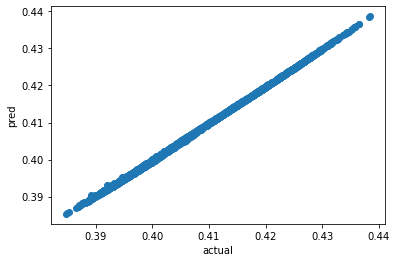

In [119]:
plt .figure(1)
plt.scatter(y_test2,y_predNN)
plt.xlabel('actual')
plt.ylabel('pred')


In [120]:
Y=pd.DataFrame(y_predNN,y_test2)
Y

,0
energy_production,
0.396610,0.396313
0.402350,0.402172
0.420085,0.419795
0.421806,0.421399
0.422757,0.422408
...,...
0.416570,0.416205
0.399582,0.399240
0.398545,0.398183


# RMSE for Neural Networking

In [121]:
RMSE_NN=np.sqrt(score[0])
print('RMSE of ANN :',RMSE_NN)

RMSE of ANN : 0.0002952840210672518


# 10]. Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train2)
regressor = LinearRegression()
regressor.fit(X_poly, y_train2)

LinearRegression()

In [53]:
y_pred_poly = regressor.predict(poly_reg.transform(X_test2))
np.set_printoptions(precision=2)

In [54]:
poly_rmse=np.sqrt(mean_squared_error(y_test2,y_pred_poly))
print(poly_rmse)

3.0411074442035675e-08


In [55]:
pol_R=metrics.explained_variance_score(y_test2,y_pred_poly) 
pol_R

0.9999999999933802

Text(0, 0.5, 'pred')

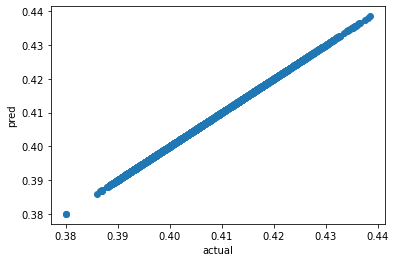

In [56]:
plt .figure(1)
plt.scatter(y_test2,y_pred_poly)
plt.xlabel('actual')
plt.ylabel('pred')


# 11].Ridge Regression

In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [129]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train2, y_train2) 
y_pred_ridge = ridgeR.predict(X_test2)  

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= data_set2.iloc[:,0:4].columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 
ridge_R=metrics.explained_variance_score(y_test2,y_pred_ridge) 
ridge_R

          Columns  Coefficient Estimate
0     temperature             -0.228309
1  exhaust_vacuum             -0.337087
2    amb_pressure             -0.197349
3      r_humidity              0.073296


0.7281851433536957

# RMSE of Ridge

In [130]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred_ridge - y_test2)**2) 
Ridge_rmse=np.sqrt(mean_squared_error_ridge)
Ridge_rmse

0.006179973125222412

# 12].LASSO Regression

In [131]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train2, y_train2) 
y_pred_lasso = lasso.predict(X_test2) 

lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = data_set2.iloc[:,0:4].columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print(lasso_coeff) 


          Columns  Coefficient Estimate
0     temperature                  -0.0
1  exhaust_vacuum                  -0.0
2    amb_pressure                  -0.0
3      r_humidity                   0.0


# RMSE of Lasso

In [132]:
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred_lasso - y_test2)**2) 
lasso_rmse=np.sqrt( mean_squared_error) 
lasso_rmse

0.01185472429483449

# 13]. Elastic Net

In [133]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(X_train2, y_train2) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test2) 
mean_squared_error = np.mean((y_pred_elastic - y_test2)**2) 
elastic_rmse= np.sqrt(mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = data_set2.iloc[:,0:4].columns  
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,temperature,-0.0
1,exhaust_vacuum,-0.0
2,amb_pressure,-0.0
3,r_humidity,0.0


In [134]:
Result=pd.DataFrame({"Model":["Random Forest1","Random Forest2","Random Forest3","Random Forest4","KNN_model1","KNN_model2","KNN_model3","KNN_model4","Bagging_model1","Bagging_model2","Bagging_model3","Bagging_model4","Ada_model1","Ada_model2","Ada_model3","Ada_model4","Multi_model","model_SVR","model_tree","model_xgb","model_NN","Polynomial Regression","Ridge Regression","LASSO Regression","Elastic Net"],"RMSE":[Random_rmse1,Random_rmse2,Random_rmse3,Random_rmse4,KNN_rmse1,KNN_rmse2,KNN_rmse3,KNN_rmse4,Bagging_rmse1,Bagging_rmse2,Bagging_rmse3,Bagging_rmse4,Ada_rmse1,Ada_rmse2,Ada_rmse3,Ada_rmse4,Multi_rmse,SVM_rmse,Decision_rmse,XGBoost_rmse,RMSE_NN,poly_rmse,Ridge_rmse,lasso_rmse,elastic_rmse]})

In [135]:
Result=Result.sort_values(by='RMSE')
Result

,Model,RMSE
21,Polynomial Regression,2.511993e-08
17,model_SVR,1.966620e-04
1,Random Forest2,2.912167e-04
3,Random Forest4,2.936991e-04
20,model_NN,2.952840e-04
11,Bagging_model4,3.388031e-04
9,Bagging_model2,3.490288e-04
16,Multi_model,3.626568e-04
19,model_xgb,4.028066e-04
7,KNN_model4,1.164343e-03


Lower the RMSE better the model